# Problem Statement-Predicting the costs of used cars given the data collected from various sources and distributed across various locations.

First we will perform data visualization and cleaning.

In [728]:
import numpy as np
import pandas as pd

In [729]:
#df=pd.read_csv('Data_Train.csv')
df = pd.read_csv('../Major Project/Data_Train.csv')

In [730]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [731]:
df.shape

(6019, 12)

In [732]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [733]:
df.dropna(inplace=True)

In [734]:
df.shape

(5975, 12)

In [735]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5133,Tata Zest Revotron 1.2 XT,Coimbatore,2015,27000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,5.27
574,Maruti Swift VDI,Chennai,2014,35000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,5.25
2162,Ford Fiesta 1.4 SXi TDCi ABS,Pune,2008,117080,Diesel,Manual,Third,17.8 kmpl,1399 CC,68 bhp,5.0,2.25
4054,Hyundai i20 Sportz 1.4 CRDi,Delhi,2017,25500,Diesel,Manual,First,22.54 kmpl,1396 CC,88.73 bhp,5.0,7.00
5361,Maruti A-Star AT VXI,Hyderabad,2013,56500,Petrol,Automatic,First,16.98 kmpl,998 CC,66.1 bhp,5.0,3.45
4801,Land Rover Freelander 2 SE,Hyderabad,2011,68000,Diesel,Automatic,First,12.39 kmpl,2179 CC,147.51 bhp,5.0,22.00
3738,Hyundai Grand i10 1.2 Kappa Sportz,Coimbatore,2016,29091,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,4.87
1351,Maruti Ciaz VXi Plus,Kochi,2015,44620,Petrol,Manual,First,20.73 kmpl,1373 CC,91.1 bhp,5.0,6.93
5203,Volkswagen Polo Diesel Highline 1.2L,Chennai,2017,26969,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,6.90
1991,Jeep Compass 2.0 Longitude,Kochi,2018,28937,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.0,17.02


In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
Price                5975 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [737]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [738]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [739]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [740]:
df[df['Owner_Type']=='Fourth & Above']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,7.0,4.00
885,Maruti Grand Vitara AT,Chennai,2008,77000,Petrol,Automatic,Fourth & Above,9.7 kmpl,1995 CC,163.5 bhp,5.0,5.50
1081,Hyundai i20 1.2 Sportz Option,Bangalore,2010,61000,Petrol,Manual,Fourth & Above,17.0 kmpl,1197 CC,80 bhp,5.0,3.25
1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,2007,90000,Diesel,Manual,Fourth & Above,10.9 kmpl,2499 CC,143 bhp,7.0,3.00
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,240000,Diesel,Manual,Fourth & Above,12.8 kmpl,2494 CC,102 bhp,8.0,5.10
3368,Maruti Swift Ldi BSIII,Pune,2009,80000,Diesel,Manual,Fourth & Above,17.8 kmpl,1248 CC,75 bhp,5.0,2.15
4148,Ford Ikon 1.3 Flair,Coimbatore,2008,59833,Petrol,Manual,Fourth & Above,13.8 kmpl,1299 CC,70 bhp,5.0,1.97
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0 kmpl,2446 CC,null bhp,8.0,2.20


In [741]:
df.corr()

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.172663,0.012338,0.305800
Kilometers_Driven,-0.172663,1.000000,0.083101,-0.011263
Seats,0.012338,0.083101,1.000000,0.052262
Price,0.305800,-0.011263,0.052262,1.000000


In [742]:
pd.get_dummies(df['Owner_Type'])

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6014,1,0,0,0
6015,1,0,0,0
6016,0,0,1,0
6017,1,0,0,0


In [743]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [744]:
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

In [745]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [746]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Task
1. change power to float
2. change engine to int/float
3. change mileage to float
4. Change owner type to categorical
5. change Transmission  to categorical
6. Change Fuel_type to categorical
7. Derive brand, model from name
8. draw different plots

In [747]:
power_list = list(df['Power'])

In [748]:
power=[]

In [749]:
#power_list

In [750]:
for name in power_list:
    power.append(name.split()[0])

In [751]:
df['Power'] = power

In [752]:
df = df[df['Power'] != 'null' ]

In [753]:
df.shape

(5872, 12)

In [ ]:
df['Power'] = df['Power'].astype('float')

In [755]:
engine_list = list(df['Engine'])

In [756]:
engine = []

In [757]:
for name in engine_list:
    engine.append(name.split(' ')[0])

In [758]:
df['Engine'] = engine

In [759]:
df['Engine'] = df['Engine'].astype('float')

In [760]:
mileage_list = list(df['Mileage'])

In [761]:
unique_unit = []

In [762]:
for x in mileage_list:
    unit = x.split(' ')[1]
    if unit not in unique_unit:
        unique_unit.append(unit)

In [763]:
unique_unit

['km/kg', 'kmpl']

1 kg = 1 l
<br>So unit km/kg and kmpl are equal</br>

In [764]:
mileage = []

In [765]:
for x in mileage_list:
    mileage.append(x.split(' ')[0])

In [766]:
df['Mileage'] = mileage

In [767]:
df['Mileage'] = df['Mileage'].astype('float')

In [768]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [769]:
def owner_numerical(x):
    if (x == 'First'):
        return 1
    elif (x == 'Second'):
        return 2
    elif (x == 'Third'):
        return 3
    elif (x == 'Fourth & Above'):
        return 4

In [770]:
df['Owner_Type'] = df['Owner_Type'].apply(owner_numerical)

In [771]:
def Transmission_numerical(x):
    if (x == 'Manual'):
        return 0
    elif (x == 'Automatic'):
        return 1

In [772]:
df['Transmission'] = df['Transmission'].apply(Transmission_numerical)

In [773]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,0,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968.0,140.80,5.0,17.74


In [774]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [775]:
def fuel_type_numerical(x):
    if (x == 'CNG'):
        return 0
    elif (x == 'Diesel'):
        return 1
    elif (x == 'Petrol'):
        return 2
    elif (x == 'LPG'):
        return 3

In [776]:
df['Fuel_Type'] = df['Fuel_Type'].apply(fuel_type_numerical)

In [777]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,0,0,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74


In [778]:
car_name = []
unique_car_brand = []

In [779]:
car_name = list(df['Name'])

In [780]:
for x in car_name:
    brand = (x.split(' ')[0])
    if brand not in unique_car_brand:
        unique_car_brand.append(brand)
        

In [781]:
unique_car_brand

['Maruti',
 'Hyundai',
 'Honda',
 'Audi',
 'Nissan',
 'Toyota',
 'Volkswagen',
 'Tata',
 'Land',
 'Mitsubishi',
 'Renault',
 'Mercedes-Benz',
 'BMW',
 'Mahindra',
 'Ford',
 'Porsche',
 'Datsun',
 'Jaguar',
 'Volvo',
 'Chevrolet',
 'Skoda',
 'Mini',
 'Fiat',
 'Jeep',
 'Ambassador',
 'ISUZU',
 'Force',
 'Bentley',
 'Lamborghini']

In [782]:
brand=[]

In [783]:
for x in df['Name']:
    brand.append(x.split(' ')[0])

In [784]:
df.insert(loc = 0, column = 'Brand', value=brand, allow_duplicates=True)

##### Label Processing

In [785]:
df['Location'].unique()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[['Brand','Location']]=df[['Brand','Location']].apply(le.fit_transform)
df

,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,17,Maruti Wagon R LXI CNG,9,2010,72000,0,0,1,26.60,998.0,58.16,5.0,1.75
1,10,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,0,1,19.67,1582.0,126.20,5.0,12.50
2,9,Honda Jazz V,2,2011,46000,2,0,1,18.20,1199.0,88.70,5.0,4.50
3,17,Maruti Ertiga VDI,2,2012,87000,1,0,1,20.77,1248.0,88.76,7.0,6.00
4,1,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,1,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,17,Maruti Swift VDI,4,2014,27365,1,0,1,28.40,1248.0,74.00,5.0,4.75
6015,10,Hyundai Xcent 1.1 CRDi S,6,2015,100000,1,0,1,24.40,1120.0,71.00,5.0,4.00
6016,16,Mahindra Xylo D4 BSIV,6,2012,55000,1,0,2,14.00,2498.0,112.00,8.0,2.90
6017,17,Maruti Wagon R VXI,8,2013,46000,2,0,1,18.90,998.0,67.10,5.0,2.65


#### Split Train and Test data

In [786]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.Price
X= df[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4697, 10) (4697,)
(1175, 10) (1175,)


#### Standard Scaler:
It assumes that your data is normally distributed within each feature. 

In [787]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

#### MinMaxScaler:
Transform features by scaling each feature to a given range. 
This estimator scales and translates each feature individually such that it isin the given range on the training set,
e.g. between zero and one.

In [788]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X_train

array([[8.21428571e-01, 8.57142857e-01, 8.26406356e-03, ...,
        3.25641980e-02, 3.63255991e-02, 3.75000000e-01],
       [8.92857143e-01, 9.04761905e-01, 1.54202518e-02, ...,
        1.43654633e-01, 6.61848612e-02, 3.75000000e-01],
       [3.57142857e-01, 9.04761905e-01, 1.43526853e-03, ...,
        2.55861556e-01, 2.20083682e-01, 3.75000000e-01],
       ...,
       [2.85714286e-01, 4.28571429e-01, 1.38202097e-02, ...,
        3.48902121e-01, 2.06922784e-01, 6.25000000e-01],
       [6.07142857e-01, 9.04761905e-01, 4.03533693e-03, ...,
        6.95943431e-02, 6.24572081e-02, 3.75000000e-01],
       [6.07142857e-01, 8.57142857e-01, 7.12172582e-04, ...,
        6.95943431e-02, 6.24572081e-02, 3.75000000e-01]])

## Random Forest

In [789]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [790]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1.66
Mean Squared Error: 13.18
Root Mean Squared Error: 3.63


In [791]:
errors = abs(y_pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy=100-mape
print(accuracy)

82.5378129319886


In [792]:
rf= regressor
features=df[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [793]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Power                Importance: 0.67
Variable: Year                 Importance: 0.17
Variable: Kilometers_Driven    Importance: 0.05
Variable: Engine               Importance: 0.04
Variable: Mileage              Importance: 0.03
Variable: Brand                Importance: 0.02
Variable: Transmission         Importance: 0.01
Variable: Seats                Importance: 0.01
Variable: Fuel_Type            Importance: 0.0
Variable: Owner_Type           Importance: 0.0


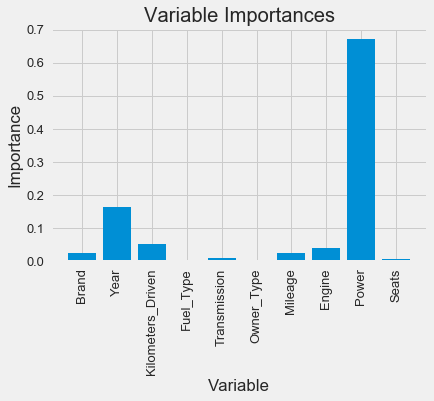

In [794]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Gradient Boosting Regressor

In [795]:
from sklearn.ensemble import GradientBoostingRegressor

In [796]:

learning_rate = 0.1
#n_estimators = list(range(700,800))
#for n in n_estimators:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)
gbr.fit(X_train, y_train)
#gbr.fit(X_train, y_train)
print(gbr.score(X_test, y_test))


0.9340081021369759


In [797]:
rf= gbr
features=df[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [798]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Power                Importance: 0.68
Variable: Year                 Importance: 0.16
Variable: Kilometers_Driven    Importance: 0.05
Variable: Engine               Importance: 0.04
Variable: Brand                Importance: 0.02
Variable: Transmission         Importance: 0.02
Variable: Mileage              Importance: 0.02
Variable: Fuel_Type            Importance: 0.01
Variable: Owner_Type           Importance: 0.0
Variable: Seats                Importance: 0.0


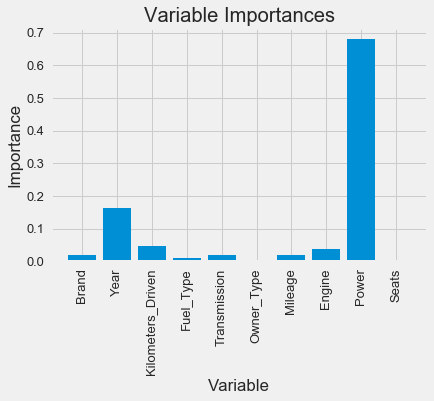

In [799]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Ridge Regression

In [800]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

First, linear regression will be applied

## Linear Regression

In [801]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

-------------Linear Regression-------------
RMSE = 6.27
Accuracy =  71.82271959776713 %
-------------Ridge Regression--------------
RMSE = 6.26


In [802]:
regressor = LinearRegression()  
#y= df.Price
#X= df[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

-2147.5179838148974
[-9.00725076e-03  1.07009553e+00  1.77599136e-06 -2.44255514e+00
  2.56311919e+00 -3.24356039e-02 -2.21692611e-01  9.38599246e-04
  1.25322483e-01 -1.18605201e+00]


In [803]:
import numpy as np
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Brand,-0.009007
Year,1.070096
Kilometers_Driven,0.000002
Fuel_Type,-2.442555
Transmission,2.563119
Owner_Type,-0.032436
Mileage,-0.221693
Engine,0.000939
Power,0.125322
Seats,-1.186052


In [804]:
OLS_pred= regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

errors = abs(y_pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy=100-mape
print(accuracy)

Mean Absolute Error: 3.82
Mean Squared Error: 39.3
Root Mean Squared Error: 6.27
-68.01226402036062


In [805]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
4204,31.00,29.11
605,12.50,13.98
205,19.90,23.19
456,8.92,10.10
1303,24.68,20.43
5522,6.60,3.42
2531,4.05,4.19
3205,9.75,12.05
937,2.10,0.13
3724,13.75,25.38


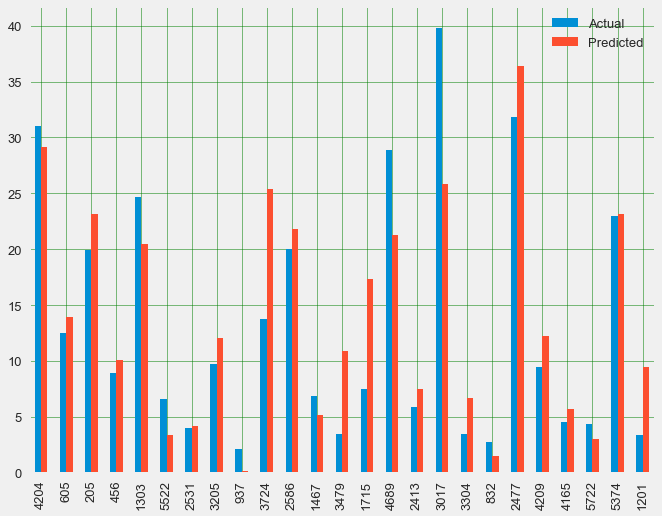

In [806]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


Evaluate OLS prediction on test data

In [807]:
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

errors = abs(y_pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy=100-mape
print(accuracy)

Mean Absolute Error: 3.69
Mean Squared Error: 34.28
Root Mean Squared Error: 5.85
21.692288407026027


# Ridge Regression

In [808]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0,0.5,'weights')

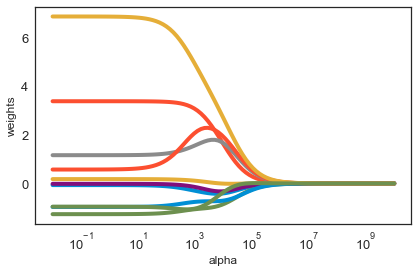

In [809]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [810]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.14240179342179024

In [811]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

Brand               -4.465285e-02
Year                 9.372636e-01
Kilometers_Driven    9.767392e-07
Fuel_Type           -2.020887e+00
Transmission         3.585636e+00
Owner_Type          -3.869398e-01
Mileage             -1.710584e-01
Engine               3.585755e-03
Power                8.477662e-02
Seats               -1.238018e+00
dtype: float64


In [812]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

errors = abs(y_pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy=100-mape
print(accuracy)

Mean Absolute Error: 3.54
Mean Squared Error: 34.4
Root Mean Squared Error: 5.87
21.692288407026027


Text(0.5,1,'Feature importance using Ridge Model')

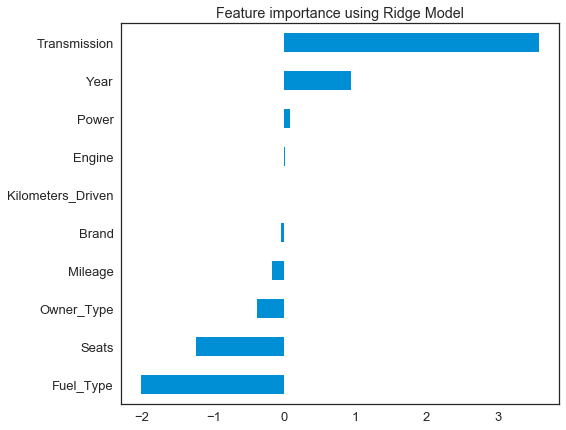

In [813]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

# Lasso

No handles with labels found to put in legend.


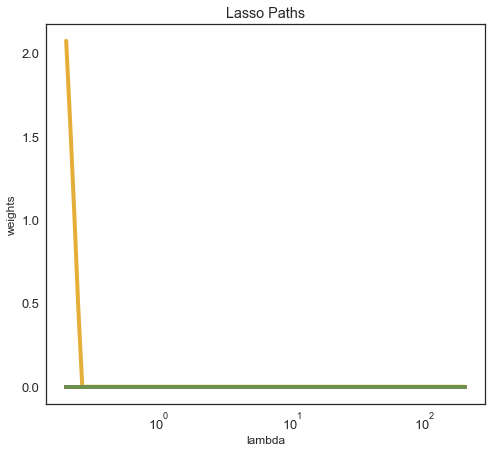

In [814]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter = 1000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [815]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

Best alpha using built-in LassoCV: 0.011328
Best score using built-in LassoCV: 0.684950
Root Mean Squared Error: 5.9


In [816]:
y_pred = reg.predict(X_test)

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

errors = abs(y_pred - y_test)
mape = np.mean(100 * (errors / y_test))
accuracy=100-mape
print(accuracy)

Mean Absolute Error: 3.43
Mean Squared Error: 34.82
Root Mean Squared Error: 5.9
38.32352717594657


In [817]:
reg.alpha_
coef

Brand               -0.000000
Year                 0.754886
Kilometers_Driven    0.000000
Fuel_Type           -0.558219
Transmission         2.080143
Owner_Type          -0.000000
Mileage             -0.000000
Engine               0.000000
Power                0.135650
Seats               -0.000000
dtype: float64

Text(0.5,1,'Feature importance using Lasso Model')

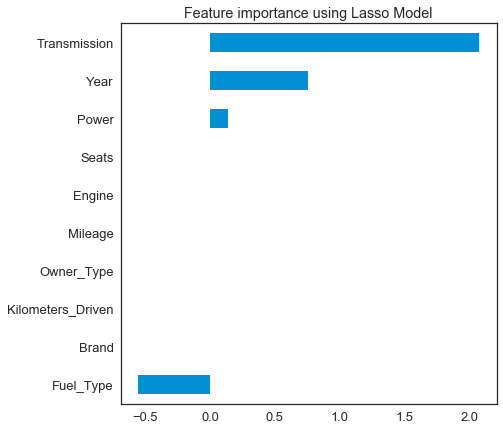

In [818]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [819]:
lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=100:", train_score001)
print ("test score for alpha =100: ", test_score001)
print ("number of features used: for alpha =100: ", coeff_used001)

training score for alpha=100: 0.5163769095461334
test score for alpha =100:  0.47816035039906
number of features used: for alpha =100:  3


# KNN

In [820]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors

rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.14272015484381
RMSE value for k=  2 is: 8.566073833145126
RMSE value for k=  3 is: 7.5350404404831375
RMSE value for k=  4 is: 7.32685934973854
RMSE value for k=  5 is: 7.320084266693203
RMSE value for k=  6 is: 7.111298229124278
RMSE value for k=  7 is: 7.120024155554803
RMSE value for k=  8 is: 7.116733719465454
RMSE value for k=  9 is: 7.097268711972944
RMSE value for k=  10 is: 7.11392213207852
RMSE value for k=  11 is: 7.163707756470531
RMSE value for k=  12 is: 7.21151427559865
RMSE value for k=  13 is: 7.293170657468021
RMSE value for k=  14 is: 7.332994862295754
RMSE value for k=  15 is: 7.347147013141814


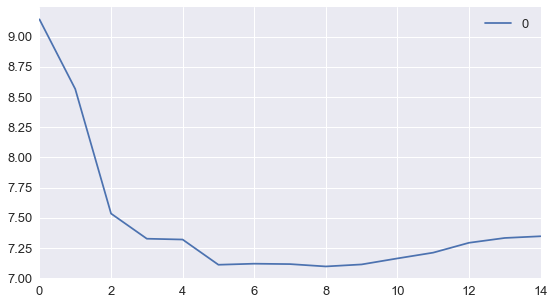

In [821]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

Finding the best k value.It can be also be found using GridSearch.

In [822]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 5}

Generating Model for k=5

In [823]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn import utils
y_train_encoded=le.fit_transform(y_train)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(y_train_encoded))

#Train the model using the training sets
knn.fit(X_train,y_train_encoded)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Model evaluation

In [824]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 226.87
Mean Squared Error: 100629.81
Root Mean Squared Error: 317.22


# Cleaning the new dataset whose value has to be predicted

1. Change power to float
2. Change engine to int/float
3. Change mileage to float
4. Change the other object type data to categorical
5. Add brand as a new column
6. Add Price as the new column with values initialized to zero

In [825]:
import pandas as pd
#df1=pd.read_csv('Data_Test.csv')
df1 = pd.read_csv('../Major Project/Data_Test.csv')

df1.isnull().sum()
df1.dropna(inplace=True)

power_list = list(df1['Power'])
power=[]
for name in power_list:
    power.append(name.split()[0])
df1['Power'] = power
df1 = df1[df1['Power'] != 'null' ]
df1['Power'] = df1['Power'].astype('float')
engine_list = list(df1['Engine'])
engine = []
for name in engine_list:
    engine.append(name.split(' ')[0])
df1['Engine'] = engine
df1['Engine'] = df1['Engine'].astype('float')

mileage_list = list(df1['Mileage'])
unique_unit = []
for x in mileage_list:
    unit = x.split(' ')[1]
    if unit not in unique_unit:
        unique_unit.append(unit)
print(unique_unit) 
mileage = []
for x in mileage_list:
    mileage.append(x.split(' ')[0])
df1['Mileage'] = mileage
df1['Mileage'] = df1['Mileage'].astype('float')

car_name = []
unique_car_brand = []
car_name = list(df1['Name'])
for x in car_name:
    brand = (x.split(' ')[0])
    if brand not in unique_car_brand:
        unique_car_brand.append(brand)
brand=[]
for x in df1['Name']:
    brand.append(x.split(' ')[0])
df1.insert(loc = 0, column = 'Brand', value=brand, allow_duplicates=True)    

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1[['Brand','Location','Fuel_Type','Transmission','Owner_Type']]=df1[['Brand','Location','Fuel_Type','Transmission','Owner_Type']].apply(le.fit_transform)

#df1['Price']=0
df1.head()

['km/kg', 'kmpl']


,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,15,Maruti Alto K10 LXI CNG,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0
1,15,Maruti Alto 800 2016-2019 LXI,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0
2,25,Toyota Innova Crysta Touring Sport 2.4 MT,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0
4,8,Hyundai i20 Magna,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0
5,14,Mahindra XUV500 W8 2WD,3,2016,85609,1,1,2,16.00,2179.0,140.00,7.0


##### We can see that RandomForestRegressor and Gradient Boosting Regressor are performing quite well on the dataset. We will predict price using  both of these models.

In [826]:
###### As we can see from the above models, the highest accuracy is produced by GradientBoostingRegressor Model. We will predict our data using that model only.

In [827]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4204,31.00,15.2710
605,12.50,10.2655
205,19.90,22.3400
456,8.92,9.0395
1303,24.68,17.2585
...,...,...
3748,7.11,6.2400
2783,7.52,6.3465
3613,7.75,7.6725
5238,3.25,3.3230


# Prediction using Gradient Boosting Regressor

In [828]:
from  sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
4204,31.00,17.519057
605,12.50,10.856380
205,19.90,23.800871
456,8.92,8.896853
1303,24.68,18.295913
...,...,...
3748,7.11,6.455947
2783,7.52,5.411501
3613,7.75,9.950609
5238,3.25,3.306356


# Now we will predict the price of the test dataset

In [829]:
new_data=df1[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
Price=regressor.predict(new_data)
df1['Price_using_RandomForestRegressor']=Price
#df1.sample(20)

In [830]:
new_data=df1[['Brand','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]
Price=gbr.predict(new_data)
df1['Price_using_GradientBoostigRegressor']=Price
#df1.sample(20)

In [831]:
df1.sample(20)

,Brand,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_using_RandomForestRegressor,Price_using_GradientBoostigRegressor
871,6,Ford Freestyle Titanium Plus Diesel,8,2018,3013,1,1,0,24.40,1498.0,98.63,5.0,9.7365,10.953035
588,15,Maruti Wagon R LXI,9,2014,12000,3,1,0,18.90,998.0,67.10,5.0,3.7250,9.961479
184,7,Honda City ZX VTEC Plus,3,2009,76677,3,1,3,16.90,1497.0,100.00,5.0,2.3185,2.968488
461,19,Nissan Micra XV CVT,3,2015,32469,3,0,0,19.34,1198.0,76.00,5.0,5.0110,13.951817
380,0,Audi A4 2.0 TDI,1,2013,46000,1,0,2,16.55,1968.0,147.51,5.0,8.7695,14.691309
1218,7,Honda Amaze S i-Dtech,8,2013,38568,1,1,0,25.80,1498.0,98.60,5.0,4.6800,6.002424
1071,15,Maruti Swift VDI,3,2015,61903,1,1,0,22.90,1248.0,74.00,5.0,4.7635,8.111101
889,11,Jaguar XF 3.0 Litre S Premium Luxury,5,2011,53000,1,0,0,14.74,2993.0,270.90,5.0,23.7175,13.991677
1001,16,Mercedes-Benz E-Class 2015-2017 E250 CDI Avant...,0,2016,29000,1,0,0,13.00,2143.0,204.00,5.0,32.2365,29.677530
378,15,Maruti Baleno Delta,7,2017,32352,3,1,0,21.40,1197.0,83.10,5.0,7.1805,8.501848
